# SMOTE IPF Implementation to oversample any dataset

The following code can be used to make create oversampled dataset using SMOTE-IPF. It also shows various details of the dataset created like the number of new samples in each class and shows a diagram showing the changes from the original dataset side by side.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
import imbalanced_databases as imbd

Loading the IRIS dataset with binary classification. IRIS can be replaced with any dataset here.

In [2]:
dataset= imbd.load_iris0()
X, y= dataset['data'], dataset['target']

## Illustrating the imbalance in the current dataset using a scatter plot

Finding the Majority class and the distribution of the dataset

In [3]:
for i in np.unique(y):
    print("class %d - samples: %d" % (i, np.sum(y == i)))

class 0 - samples: 100
class 1 - samples: 50


We find that class 0 is the majority class. Using that information and making a scatter plot of the dataset.

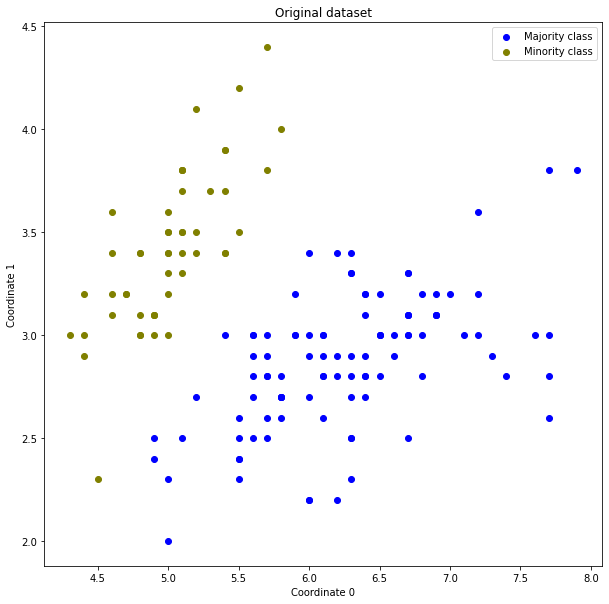

In [14]:
plt.figure(figsize=(10, 10))
plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='Majority class', c='blue')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='Minority class', c='olive')
plt.title('Original dataset')
plt.xlabel('Coordinate 0')
plt.ylabel('Coordinate 1')
plt.legend()

## Oversampling using SMOTE_IPF

We use default paramaters with proportion `1.0`. This ensures that the oversampled dataset has equal number of samples. All the default parameters are 
```
{
    'proportion': 1.0, 
    'n_neighbors': 5, # number of neighbors in SMOTE sampling
    'n_folds': 9, # the number of partitions
    'k': 3, # used in stopping condition
    'p': 0.01, #  percentage value ([0,1]) used in stopping condition
    'voting': 'majority', # 'majority'/'consensus'
    'n_jobs': 1, # number of parallel jobs
    'classifier': DecisionTreeClassifier(random_state=2), # classifier object
    'random_state': None # initializer of random_state
}
```

In [5]:
oversampler= sv.SMOTE_IPF()
X_samp, y_samp= oversampler.sample(X, y)

2021-11-20 23:19:15,970:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2021-11-20 23:19:15,971:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nmc/.local/lib/python3.9/site-packages/numpy/random/__init__.py'>}")
2021-11-20 23:19:15,979:INFO:SMOTE_IPF: Removing 0 elements
2021-11-20 23:19:15,985:INFO:SMOTE_IPF: Removing 0 elements
2021-11-20 23:19:15,992:INFO:SMOTE_IPF: Removing 0 elements


`X_samp` contains oversampled `X` data and `y_samp` contains oversampled `y` data. Now let's look at the number of samples in each class.

In [6]:
print('Majority class: %d' % np.sum(y_samp == 0))
print('Minority class: %d' % np.sum(y_samp == 1))

Majority class: 100
Minority class: 100


Each class has equal number of datapoints as we have described above. Now we filters newly sampled datapoints to plot them distinctly below.

In [7]:
X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

Printing the number of new samples

In [8]:
for i in np.unique(y_samp):
    print("class %d - samples: %d" % (i, np.sum(y_samp == i)))

class 1 - samples: 50


Now using a scatter plot, we plot Original dataset vs Oversampled dataset, showing the new samples distinctly.

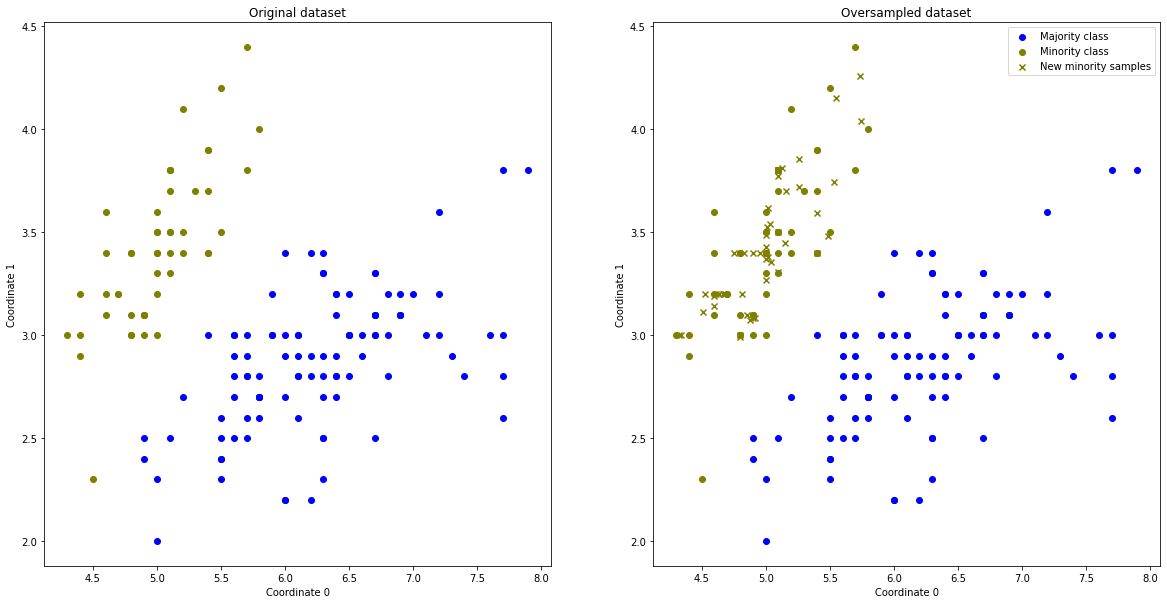

In [13]:
plt.figure(figsize=(20, 10))
ax= plt.subplot(121) # Plotting original
plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='Majority class', c='blue', marker='o')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='Minority class', c='olive', marker='o')
# plt.scatter(X_samp[y_samp == 1][:,0], X_samp[y_samp == 1][:,1], label='New minority samples', c='olive', marker='x')
plt.title('Original dataset')
plt.xlabel('Coordinate 0')
plt.ylabel('Coordinate 1')


ax= plt.subplot(122)
plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='Majority class', c='blue', marker='o')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='Minority class', c='olive', marker='o')
plt.scatter(X_samp[y_samp == 1][:,0], X_samp[y_samp == 1][:,1], label='New minority samples', c='olive', marker='x')
plt.title('Oversampled dataset')
plt.xlabel('Coordinate 0')
plt.ylabel('Coordinate 1')
plt.legend()